# Working with Missing Data

**Utilizing the Boston Housing dataset**

Import and Load all libraries

In [2]:
# Import package dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from ml_metrics import rmse
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [3]:
# Load in the dataset
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [5]:
# View the data descriptions
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
# Convert the matrix to pandas
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['MEDV'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
bos.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Start by fitting a Linear Regression model to the full dataset

**Create a training and testing split (ex., 70/30-split)**

In [10]:
# Create training and testing sets (cross-validation not needed)
train_set = bos.sample(frac=0.7, random_state=100)
test_set = bos[~bos.isin(train_set)].dropna()
print(train_set.shape[0])
print(test_set.shape[0])

354
152


In [11]:
train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6
229,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76,31.5
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.5
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,16.2


In [12]:
# Get the training and testing row indices for later use
train_index = train_set.index.values.astype(int)
test_index = test_set.index.values.astype(int)

In [13]:
# Demonstration of using the row indices above to select consistent records
bos.iloc[train_index].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6
229,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76,31.5
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.5
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,16.2


In [14]:
# Converting the training and testing datasets back to matrix-formats
X_train = train_set.iloc[:, :-1].values # returns the data; excluding the target
Y_train = train_set.iloc[:, -1].values # returns the target-only
X_test = test_set.iloc[:, :-1].values # ""
Y_test = test_set.iloc[:, -1].values # ""

In [15]:
# Fit a linear regression to the training data
reg = LinearRegression(normalize=True).fit(X_train, Y_train)
print(reg.score(X_train, Y_train))
print(reg.coef_)
print(reg.intercept_)
print(reg.get_params())

0.747697187267507
[-1.33787959e-01  5.48193978e-02  5.51497011e-02  3.57699747e+00
 -2.01694206e+01  3.95439406e+00  1.34856919e-02 -1.48754959e+00
  2.98541622e-01 -9.83073904e-03 -9.46460994e-01  6.59127244e-03
 -5.78904804e-01]
36.155870673220406
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': True}


In [16]:
# Find the variable with the largest "normalized" coefficient value
print('The abs(max) coef-value is {}'.format(max(reg.coef_))) # Positive Max
#print('The abs(max) coef-value is {}'.format(max(reg.coef_, key=abs))) # ABS Max
max_var = max(reg.coef_) # Positive Max
#max_var = max(reg.coef_, key=abs) # ABS Max
var_index = reg.coef_.tolist().index(max_var)
print('The variable associated with this coef-value is {}'.format(boston.feature_names[var_index]))

The abs(max) coef-value is 3.9543940554598604
The variable associated with this coef-value is RM


In [17]:
Y_pred = reg.predict(X_test)

orig_mae = mean_absolute_error(Y_test,Y_pred)
orig_mse = mean_squared_error(Y_test,Y_pred)
orig_rmse_val = rmse(Y_test,Y_pred)
orig_r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%orig_mae)
print("MSE:  %.3f"%orig_mse)
print("RMSE:  %.3f"%orig_rmse_val)
print("R2:  %.3f"%orig_r2)

MAE: 3.601
MSE:  24.071
RMSE:  4.906
R2:  0.705


In [75]:
res_frame = pd.DataFrame({'data':'original',
                   'imputation':'none',
                   'mae': orig_mae, 
                   'mse': orig_mse, 
                   'rmse':orig_rmse_val, 
                   'R2':orig_r2,
                   'mae_diff':np.nan,
                   'mse_diff':np.nan,
                   'rmse_diff':np.nan,
                   'R2_diff':np.nan}, index=[0])

In [76]:
res_frame

,R2,R2_diff,data,imputation,mae,mae_diff,mse,mse_diff,rmse,rmse_diff
0,0.70528,NaN,original,none,3.601135,NaN,24.070703,NaN,4.90619,NaN


## Round 1 of Imputation

**Here we can randomly sample the full dataset and replace a single column's values**

In [20]:
in_sample = bos.sample(frac=0.3, random_state=99)
in_sample.shape

(152, 14)

In [21]:
out_sample = bos[~bos.isin(in_sample)].dropna()
out_sample.shape

(354, 14)

In [22]:
print(out_sample.shape[0] + in_sample.shape[0])
print(bos.shape[0])

506
506


In [23]:
in_sample.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
281,0.03705,20.0,3.33,0.0,0.4429,6.968,37.2,5.2447,5.0,216.0,14.9,392.23,4.59,35.4
273,0.22188,20.0,6.96,1.0,0.4640,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58,35.2
251,0.21409,22.0,5.86,0.0,0.4310,6.438,8.9,7.3967,7.0,330.0,19.1,377.07,3.59,24.8
329,0.06724,0.0,3.24,0.0,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6
40,0.03359,75.0,2.95,0.0,0.4280,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9


## Choose a variable to replace

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <a list of 10 Patch objects>)

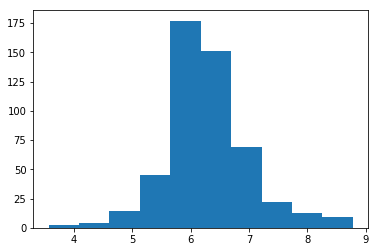

In [100]:
plt.hist(bos['RM'])

In [24]:
#in_sample['NOX'] = np.nan
in_sample['RM'] = np.nan
in_sample.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
281,0.03705,20.0,3.33,0.0,0.4429,NaN,37.2,5.2447,5.0,216.0,14.9,392.23,4.59,35.4
273,0.22188,20.0,6.96,1.0,0.4640,NaN,51.8,4.3665,3.0,223.0,18.6,390.77,6.58,35.2
251,0.21409,22.0,5.86,0.0,0.4310,NaN,8.9,7.3967,7.0,330.0,19.1,377.07,3.59,24.8
329,0.06724,0.0,3.24,0.0,0.4600,NaN,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6
40,0.03359,75.0,2.95,0.0,0.4280,NaN,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9


**Choose an imputation method**

In [25]:
#out_sample['NOX'].median()
out_sample['RM'].median()

6.2085

In [26]:
#in_sample['NOX'] = in_sample['NOX'].fillna(out_sample['NOX'].median())
#in_sample['NOX'] = in_sample['NOX'].fillna(1)
in_sample['RM'] = in_sample['RM'].fillna(out_sample['RM'].median())
in_sample.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
281,0.03705,20.0,3.33,0.0,0.4429,6.2085,37.2,5.2447,5.0,216.0,14.9,392.23,4.59,35.4
273,0.22188,20.0,6.96,1.0,0.4640,6.2085,51.8,4.3665,3.0,223.0,18.6,390.77,6.58,35.2
251,0.21409,22.0,5.86,0.0,0.4310,6.2085,8.9,7.3967,7.0,330.0,19.1,377.07,3.59,24.8
329,0.06724,0.0,3.24,0.0,0.4600,6.2085,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6
40,0.03359,75.0,2.95,0.0,0.4280,6.2085,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9


**Rejoin the imputed and original datasets**

In [27]:
imputed_data = pd.concat([in_sample, out_sample])
imputed_data = imputed_data.sort_index()
imputed_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.5750,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.4210,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,6.2085,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.2085,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.1470,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Use the same training and testing indices to fit the model**

In [28]:
train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]
train_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.3090,2.0,329.0,12.6,392.20,6.62,34.6
229,0.44178,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8.0,307.0,17.4,380.34,3.76,31.5
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04,14.5
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,16.2


In [29]:
X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

**Fit a new model to the imputed dataset**

In [30]:
reg2 = LinearRegression().fit(X_train, Y_train)
print(reg2.score(X_train, Y_train))
print(reg2.coef_)
print(reg2.intercept_)
print(reg2.get_params())

0.7341807537269325
[-1.42139276e-01  6.37180822e-02  3.40227967e-02  3.22619162e+00
 -2.20277995e+01  3.42246602e+00  2.60029689e-02 -1.57189389e+00
  3.12655115e-01 -9.48651814e-03 -9.79821966e-01  4.76899810e-03
 -6.94096765e-01]
42.67419591314121
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}


In [31]:
Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print("MAE: %.3f"%mae)
print("MSE:  %.3f"%mse)
print("RMSE:  %.3f"%rmse_val)
print("R2:  %.3f"%r2)

MAE: 3.717
MSE:  25.958
RMSE:  5.095
R2:  0.682


In [69]:
temp_frame = pd.DataFrame({'data':'30% imputed',
                   'imputation':'MAR',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])

In [33]:
res_frame = pd.concat([res_frame, temp_frame])
res_frame

,R2,R2_diff,data,imputation,mae,mae_diff,mse,mse_diff,rmse,rmse_diff
0,0.70528,NaN,original,none,3.601135,NaN,24.070703,NaN,4.90619,NaN
0,0.68217,-0.02311,30% imputed,MAR,3.717436,0.116301,25.958207,1.887505,5.09492,0.18873


## Step 2
Below we select several amount of data at random. Then we selected the column "RM" to be replace it with NULL values. The median was the imputation value for this column.

(506, 14)


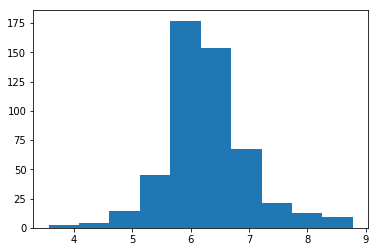

(506, 14)


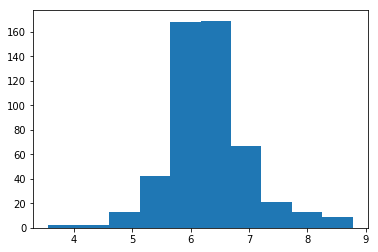

(506, 14)


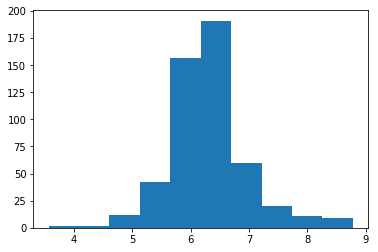

(506, 14)


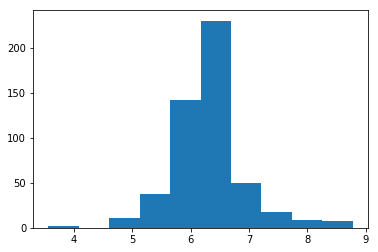

(506, 14)


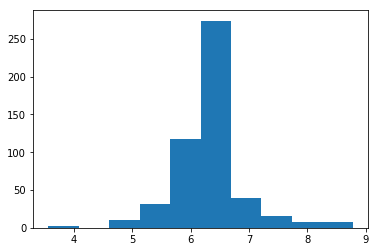

(506, 14)


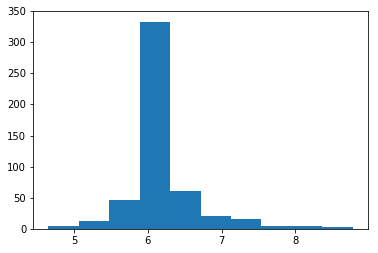

,R2,R2_diff,data,imputation,mae,mae_diff,mse,mse_diff,rmse,rmse_diff
0,0.705280,NaN,original,none,3.601135,NaN,24.070703,NaN,4.906190,NaN
0,0.703949,-0.001331,1.0% imputed,CAR,3.630759,0.029625,24.179407,0.108705,4.917256,0.011066
0,0.698551,-0.006730,5.0% imputed,CAR,3.641325,0.040190,24.620323,0.549621,4.961887,0.055697
0,0.692386,-0.012894,10.0% imputed,CAR,3.655780,0.054646,25.123810,1.053107,5.012366,0.106175
0,0.693609,-0.011671,20.0% imputed,CAR,3.660989,0.059854,25.023910,0.953208,5.002390,0.096200
0,0.681022,-0.024258,33.0% imputed,CAR,3.722747,0.121613,26.051923,1.981221,5.104108,0.197918
0,0.671276,-0.034004,50.0% imputed,CAR,3.760376,0.159241,26.847911,2.777208,5.181497,0.275307


In [102]:
# Reset the dataframe
res_frame = pd.DataFrame({'data':'original',
                   'imputation':'none',
                   'mae': orig_mae, 
                   'mse': orig_mse, 
                   'rmse':orig_rmse_val, 
                   'R2':orig_r2,
                   'mae_diff':np.nan,
                   'mse_diff':np.nan,
                   'rmse_diff':np.nan,
                   'R2_diff':np.nan}, index=[0])

# loop to obtain all the percentages
lookUpPerc = [0.01,0.05,0.1,0.2,0.33,0.5]

for p in lookUpPerc:
    in_sample = bos.sample(frac=p, random_state=99)
    #print(in_sample.shape)
    out_sample = bos[~bos.isin(in_sample)].dropna()
    #print(out_sample.shape)
    
    # Replace the Percent of Data for variable RM with NULL
    in_sample['RM'] = np.nan 
    
    # Replace the NA Values with the median as imputation 
    in_sample['RM'] = in_sample['RM'].fillna(out_sample['RM'].median())
    
    # merge both in_sample and out_sample sets
    imputed_data = pd.concat([in_sample, out_sample])
    imputed_data = imputed_data.sort_index()
    print(imputed_data.shape)
    plt.hist(imputed_data['RM'])
    plt.show()
    # Use the original indexes on the imputed data to obtain the train and test set
    train_set = imputed_data.iloc[train_index]
    test_set = imputed_data.iloc[test_index]
    X_train = train_set.iloc[:, :-1].values
    Y_train = train_set.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    Y_test = test_set.iloc[:, -1].values
    
    #Fit the Linear Regression
    reg2 = LinearRegression().fit(X_train, Y_train)
    
    #Predict The Test Values
    Y_pred = reg2.predict(X_test)
    
    mae = mean_absolute_error(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse_val = rmse(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    
    temp_frame2 = pd.DataFrame({'data':str(p*100) + '% imputed',
                   'imputation':'CAR',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])
    res_frame = pd.concat([res_frame, temp_frame2])
    
res_frame    

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


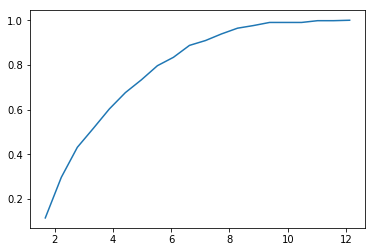

In [79]:
num_bins = 20
counts, bin_edges = np.histogram (bos['DIS'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

## Step 3
The variable selected was "DIS". All the values below 4.5 represent aproximate 60% of the data as per the above CDF. Then from that subset of data the variables "RM" and "AGE" were selected as randomly missing. The imputation was then done in each of the columns after they were set NULL. The imputatation use was the median.

(506, 14)


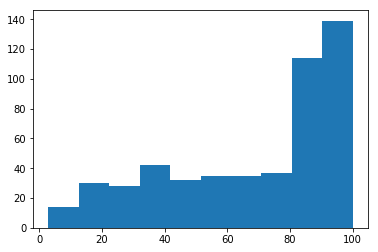

(506, 14)


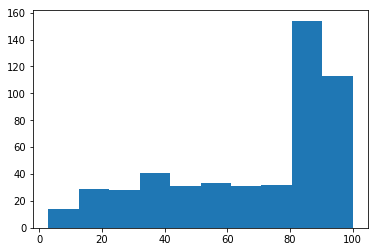

(506, 14)


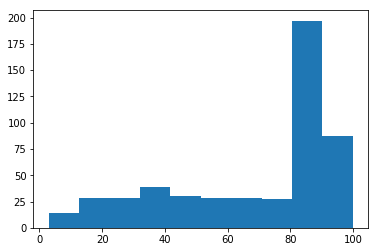

,R2,R2_diff,data,imputation,mae,mae_diff,mse,mse_diff,rmse,rmse_diff
0,0.705280,NaN,original,none,3.601135,NaN,24.070703,NaN,4.906190,NaN
0,0.703949,-0.001331,1.0% imputed,CAR,3.630759,0.029625,24.179407,0.108705,4.917256,0.011066
0,0.698551,-0.006730,5.0% imputed,CAR,3.641325,0.040190,24.620323,0.549621,4.961887,0.055697
0,0.692386,-0.012894,10.0% imputed,CAR,3.655780,0.054646,25.123810,1.053107,5.012366,0.106175
0,0.693609,-0.011671,20.0% imputed,CAR,3.660989,0.059854,25.023910,0.953208,5.002390,0.096200
0,0.681022,-0.024258,33.0% imputed,CAR,3.722747,0.121613,26.051923,1.981221,5.104108,0.197918
0,0.671276,-0.034004,50.0% imputed,CAR,3.760376,0.159241,26.847911,2.777208,5.181497,0.275307
0,0.730375,0.025095,n=50 Samples,MAR,3.433358,-0.167776,24.255557,0.184854,4.924993,0.018803
0,0.728192,0.022912,n=101 Samples,MAR,3.453071,-0.148063,24.451942,0.381240,4.944891,0.038700
0,0.734621,0.029340,n=152 Samples,MAR,3.420797,-0.180337,23.873610,-0.197093,4.886063,-0.020127


In [104]:
# Step 3 Two Columns at rando with a third column for control
nValues= [50,101,152]
for nV in nValues:
    subSetIn = bos[bos['DIS'] < 4.5]
    subSetOut = bos[~bos.isin(subSetIn)].dropna()
    #print(subSet.shape)
    # Select the samples 
    in_sample = subSetIn.sample(n=nV, random_state=99)
    #print(in_sample.shape)
    out_sample = subSetIn[~subSetIn.isin(in_sample)].dropna()
    # Replace the Percent of Data for variable RM with NULL
    in_sample['RM'] = np.nan 
    
    # Replace the NA Values with the median as imputation 
    in_sample['RM'] = in_sample['RM'].fillna(out_sample['RM'].median())
    
    # Temp Subset2
    tempSubSet2 = pd.concat([in_sample, out_sample])
    tempSubSet2 = tempSubSet2.sort_index()
    
    in_sample = tempSubSet2.sample(n=nV, random_state=98)
    out_sample = tempSubSet2[~tempSubSet2.isin(in_sample)].dropna()
    # Replace the Percent of Data for variable RM with NULL
    in_sample['AGE'] = np.nan 
    
    # Replace the NA Values with the median as imputation 
    in_sample['AGE'] = in_sample['AGE'].fillna(out_sample['AGE'].median())
    
    # merge both in_sample and out_sample sets
    sub_imputed_data = pd.concat([in_sample, out_sample])
    sub_imputed_data = sub_imputed_data.sort_index()
    imputed_data = pd.concat([sub_imputed_data, subSetOut])
    print(imputed_data.shape)
    plt.hist(imputed_data['AGE'])
    plt.show()
       # Use the original indexes on the imputed data to obtain the train and test set
    train_set = imputed_data.iloc[train_index]
    test_set = imputed_data.iloc[test_index]
    X_train = train_set.iloc[:, :-1].values
    Y_train = train_set.iloc[:, -1].values
    X_test = test_set.iloc[:, :-1].values
    Y_test = test_set.iloc[:, -1].values
    
    #Fit the Linear Regression
    reg2 = LinearRegression().fit(X_train, Y_train)
    
    #Predict The Test Values
    Y_pred = reg2.predict(X_test)

    mae = mean_absolute_error(Y_test,Y_pred)
    mse = mean_squared_error(Y_test,Y_pred)
    rmse_val = rmse(Y_test,Y_pred)
    r2 = r2_score(Y_test,Y_pred)
    
    temp_frame2 = pd.DataFrame({'data':'n=' + str(nV) + ' Samples',
                   'imputation':'MAR',
                   'mae': mae, 
                   'mse': mse, 
                   'rmse':rmse_val,
                   'R2':r2,
                   'mae_diff':mae-orig_mae,
                   'mse_diff':mse-orig_mse,
                   'rmse_diff':rmse_val-orig_rmse_val,
                   'R2_diff':r2-orig_r2
                   }, index=[0])
    res_frame = pd.concat([res_frame, temp_frame2])
    
res_frame 

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


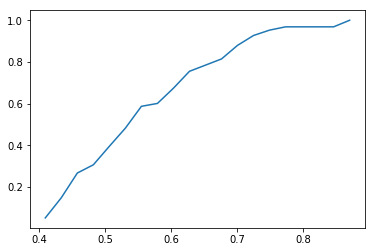

In [85]:
num_bins = 20
counts, bin_edges = np.histogram (bos['NOX'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

## Step 4
Select 25% of the data not at random. The column selected was 'NOX'. All vales below 0.45 represent aproximate 25% of the total data as per the above CDF Chart.

In [98]:
subSetIn = bos[bos['NOX'] < .45]
subSetOut = bos[~bos.isin(subSetIn)].dropna()
subSetIn['NOX'] = np.nan 
subSetIn['NOX'] = subSetIn['NOX'].fillna(subSetOut['NOX'].median())
subSetIn.shape

imputed_data = pd.concat([subSetIn, subSetOut])
print(imputed_data.shape)
   # Use the original indexes on the imputed data to obtain the train and test set
train_set = imputed_data.iloc[train_index]
test_set = imputed_data.iloc[test_index]
X_train = train_set.iloc[:, :-1].values
Y_train = train_set.iloc[:, -1].values
X_test = test_set.iloc[:, :-1].values
Y_test = test_set.iloc[:, -1].values

#Fit the Linear Regression
reg2 = LinearRegression().fit(X_train, Y_train)

#Predict The Test Values
Y_pred = reg2.predict(X_test)

mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
rmse_val = rmse(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)

temp_frame2 = pd.DataFrame({'data':'25% Not at Random',
               'imputation':'NAR',
               'mae': mae, 
               'mse': mse, 
               'rmse':rmse_val,
               'R2':r2,
               'mae_diff':mae-orig_mae,
               'mse_diff':mse-orig_mse,
               'rmse_diff':rmse_val-orig_rmse_val,
               'R2_diff':r2-orig_r2
               }, index=[0])
res_frame = pd.concat([res_frame, temp_frame2])
res_frame

(506, 14)


D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,R2,R2_diff,data,imputation,mae,mae_diff,mse,mse_diff,rmse,rmse_diff
0,0.705280,NaN,original,none,3.601135,NaN,24.070703,NaN,4.906190,NaN
0,0.703949,-0.001331,1.0% imputed,CAR,3.630759,0.029625,24.179407,0.108705,4.917256,0.011066
0,0.698551,-0.006730,5.0% imputed,CAR,3.641325,0.040190,24.620323,0.549621,4.961887,0.055697
0,0.692386,-0.012894,10.0% imputed,CAR,3.655780,0.054646,25.123810,1.053107,5.012366,0.106175
0,0.693609,-0.011671,20.0% imputed,CAR,3.660989,0.059854,25.023910,0.953208,5.002390,0.096200
0,0.681022,-0.024258,33.0% imputed,CAR,3.722747,0.121613,26.051923,1.981221,5.104108,0.197918
0,0.671276,-0.034004,50.0% imputed,CAR,3.760376,0.159241,26.847911,2.777208,5.181497,0.275307
0,0.730375,0.025095,n=50 Samples,MAR,3.433358,-0.167776,24.255557,0.184854,4.924993,0.018803
0,0.728192,0.022912,n=101 Samples,MAR,3.453071,-0.148063,24.451942,0.381240,4.944891,0.038700
0,0.734621,0.029340,n=152 Samples,MAR,3.420797,-0.180337,23.873610,-0.197093,4.886063,-0.020127
